# **Classification of areas prone to forest fires**


*Aimi Okabayashi, Thomas Boyer, David Dahan, Pierre-Aurélien Stahl, Pierre Personnat, Martial Gil*


This challenge was done as a project for the Master 2 Data Science (2022/2023), DATACAMP course:
<br><br>


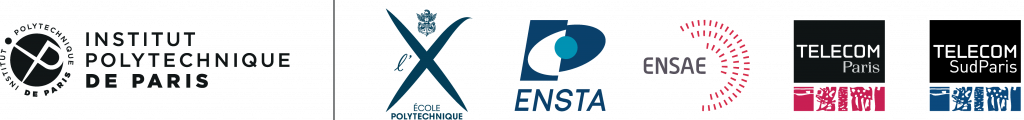

## **Introduction**

On August 8, with 187,114 fires, the record number of daily fires ever recorded worldwide was set. No region of the world has been spared.

Forest fires in the world have doubled in 20 years. Global warming as well as drought are hitting particularly hard in the United States where these disasters are growing at an exponential rate with in 2022, about 49,700 fires that occurred in the country, with a total of about 3 million hectares burned. By comparison, more than 785,000 hectares went up in smoke in Europe in 2022 and that is nearly 50 times the area burned in France in 2022 after a devastating summer of fires, although the USA represents in surface "only" about 18 times France.

<img src="sizeofwildfires-large.png" alt="drawing" width="500"/>

Forest fires now ravage about 3 million hectares more each year than in 2001, an area equivalent to that of Belgium. As a result, the loss of forest cover due to fires is increasing by about 4% per year.

Today a UN publication calls on governments to adopt a new "Fire Ready Formula", with two-thirds of spending devoted to planning, prevention, preparedness and recovery, and the remaining third to response. Today, direct responses to wildfires typically receive more than half of related spending, while planning receives less than one percent, according to the UN's environmental program.

With this in mind, our study will focus on building a model that predicts the probability that a geographic location in the US will be a fire outbreak in order to simulate potential fire paths and assist in the prevention and control of these fires. In this regard, we have a dataset that contains about 20 features for each point of interest. 

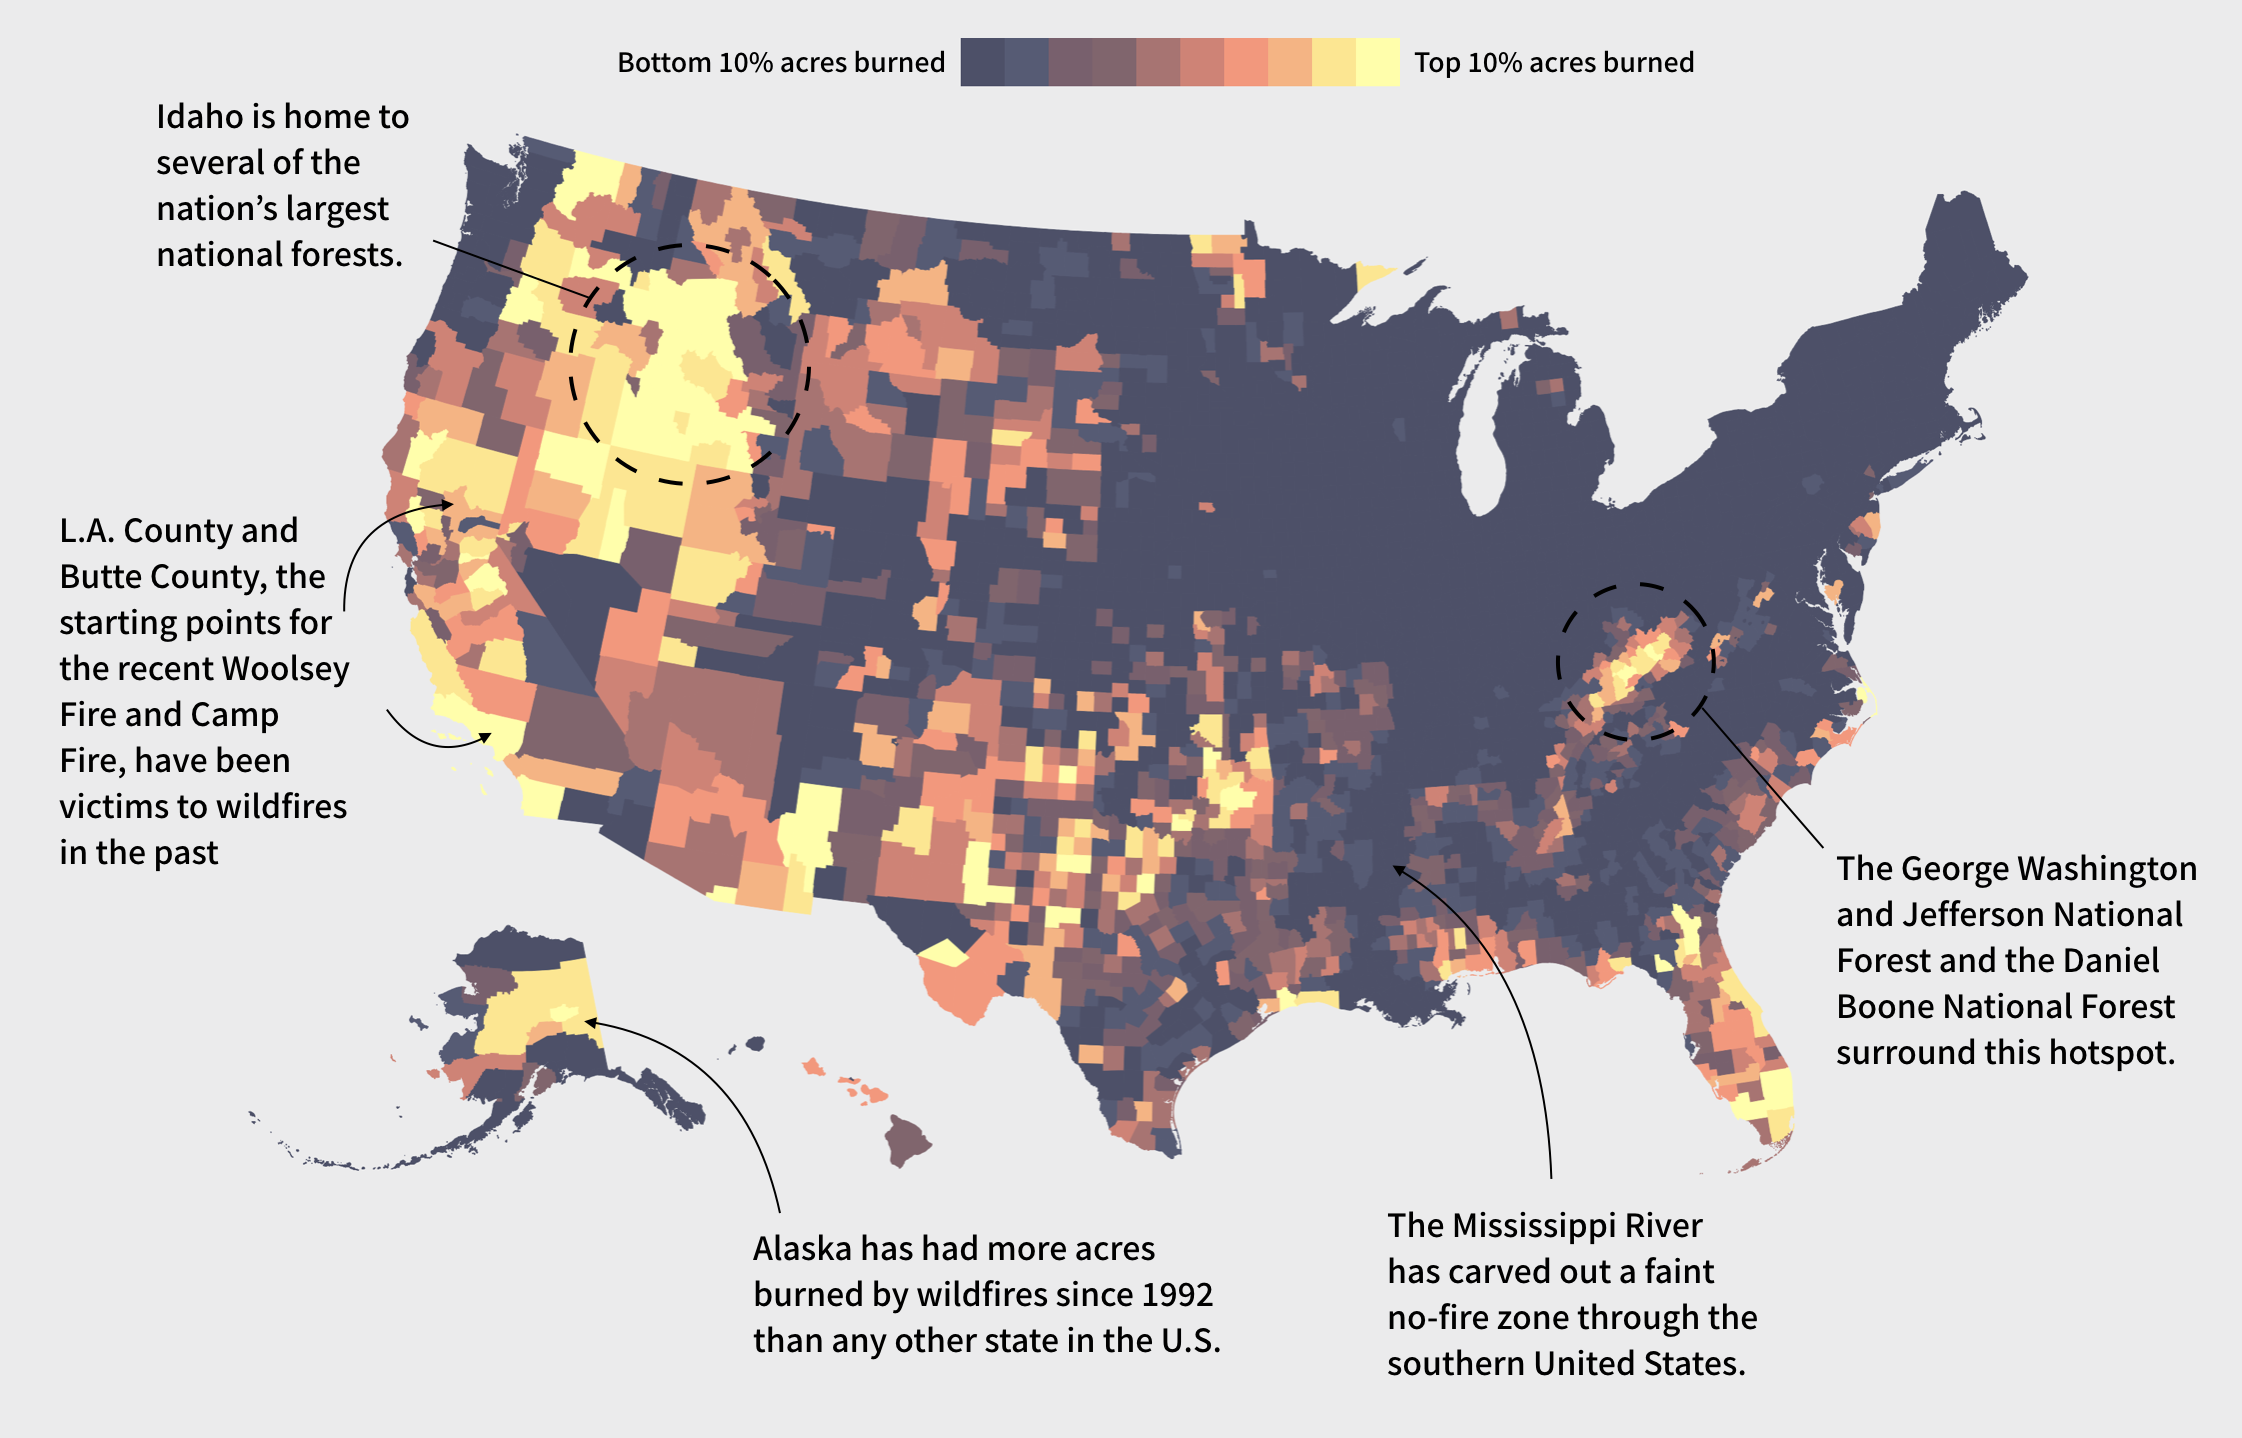

                                % of acres touched by wildfires in the US, 1992 - 2015

This project aims at constructing a machine learning model capable at classifying point of areas prone to forest fires. We thus have a classification problem.

## Description of the data

Each row of the dataset consists of a fire outbreak or non-fire outbreak point with the given features associated (from 2001 to 2021).

In each row of the data, there is a label `fire` that show is the specific point was a fire ignition point (1) (meaning that it occured historically) or not (0).

#### **Input Data**

The features are:
    
- `Date` : Date of the events     

- `mean_temp` *(numeric)*: Mean Temperature of the day (in °C)

- `urban` *(numeric)*: ratio of urbanisation of the area (between 0 and 1)

- `max_v_wind` *(numeric)*: maximimum of wind velocity (in m/s)

- `water` *(numeric)*: ratio of water in the area (between 0 and 1)

- `forest_cover` *(numeric)*: ratio of forest in the area (between 0 and 1)

- `pop_dens` *(numeric)*: density of population in the area (between 0 and 1)

- `max_temp` *(numeric)*: Maximum Temperature of the day (in °C)

- `sum_prec` *(numeric)*: precipitation of the day in the area (in mm)

- `mean_soil` *(numeric)*: Mean soil moisture of the day (m^3/m^3)

- `vegetation` *(categorical)*: type of vegetation (list of names):
    * **herbaceous_vegetation**
    * **forest**
    * **water**
    * **wetland**
    * **shrubland**
    * **urban**

- `mean_rel_humidity` *(numeric)*: mean relative humidity (in %)

- `wetland` *(numeric)*: ratio of wetland in the area (between 0 and 1) 

- `mean_wind_angle` *(numeric)*: average angle of wind during the event (in °)

- `anom_{feature}` *(numeric)*: standardized anomaly of weather for the given day over the last 20 years.

#### **Output Data**

The output `fire` is a binary label.





## **Requirements for running the notebook**

To properly run the notebook, the following Python modules must be imported :

In [1]:
%pip install ramp-workflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from problem import get_test_data, get_train_data

In [3]:
!python download_data.py

Checking the data URL...Ok.
Extracting now...Ok.
Removing the archive...Ok.



  0%|          | 0.00/1.93M [00:00<?, ?bytes/s]
  2%|1         | 32.8k/1.93M [00:00<00:11, 171kbytes/s]
  8%|8         | 164k/1.93M [00:00<00:02, 630kbytes/s] 
 18%|#7        | 344k/1.93M [00:00<00:01, 1.02Mbytes/s]
 25%|##4       | 475k/1.93M [00:00<00:01, 1.03Mbytes/s]
 40%|###9      | 770k/1.93M [00:00<00:00, 1.42Mbytes/s]
 48%|####7     | 918k/1.93M [00:00<00:00, 1.28Mbytes/s]
 62%|######1   | 1.20M/1.93M [00:00<00:00, 1.59Mbytes/s]
 76%|#######6  | 1.47M/1.93M [00:01<00:00, 1.78Mbytes/s]
 87%|########6 | 1.67M/1.93M [00:01<00:00, 1.41Mbytes/s]
100%|##########| 1.93M/1.93M [00:01<00:00, 1.43Mbytes/s]


## Reading data 

In [4]:
dataframe_path = Path("data", "data.csv")

df = pd.read_csv(dataframe_path, sep=";")
data = df.drop(columns=["fire"])
labels = df["fire"]

In [5]:
df.head()

,Date,vegetation_class,anom_avg_rel_hum,anom_avg_temp,pop_dens,sum_prec,anom_sum_prec,mean_temp,anom_max_temp,water,...,sprarse_vegetation,anom_avg_soil,forest_cover,urban,mean_soil,mean_rel_hum,anom_max_wind_vel,wetland,max_v_wind,fire
0,2002-05-17,water,3.902137,2.975559,0.000000,0.000000,2.079830,6.985018,1.680352,1.0,...,0.00,0.249073,0.0,0.0,0.280876,81.183693,-1.349666,0.0,5.654991,0
1,2002-12-21,forest,5.075868,5.965213,0.528496,0.026780,-1.059608,13.274018,4.283470,0.0,...,0.00,-1.088784,1.0,0.0,0.223595,76.526718,0.503388,0.0,8.600533,0
2,2014-08-10,water,1.519328,6.244270,0.000000,5.884455,-0.567316,8.148656,5.640811,1.0,...,0.00,0.587417,0.0,0.0,0.348755,83.542183,3.861017,0.0,4.003726,0
3,2015-03-16,forest,0.058213,6.767459,0.000000,0.008471,-0.652408,9.671815,5.672688,0.0,...,0.00,0.230208,1.0,0.0,0.306493,70.337303,-2.608491,0.0,2.348033,1
4,2010-09-02,herbaceous_vegetation,6.656128,3.389695,0.006490,2.641847,-0.238164,7.449914,0.750534,0.0,...,0.25,1.125560,0.0,0.0,0.243519,76.186241,0.127311,0.0,5.675336,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16087 entries, 0 to 16086
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                16087 non-null  object 
 1   vegetation_class    16065 non-null  object 
 2   anom_avg_rel_hum    16087 non-null  float64
 3   anom_avg_temp       16087 non-null  float64
 4   pop_dens            16087 non-null  float64
 5   sum_prec            16087 non-null  float64
 6   anom_sum_prec       16087 non-null  float64
 7   mean_temp           16087 non-null  float64
 8   anom_max_temp       16087 non-null  float64
 9   water               16082 non-null  float64
 10  mean_wind_angle     16087 non-null  float64
 11  max_temp            16087 non-null  float64
 12  sprarse_vegetation  16082 non-null  float64
 13  anom_avg_soil       16087 non-null  float64
 14  forest_cover        16087 non-null  float64
 15  urban               16082 non-null  float64
 16  mean

In [7]:
description = df.describe()
description

,anom_avg_rel_hum,anom_avg_temp,pop_dens,sum_prec,anom_sum_prec,mean_temp,anom_max_temp,water,mean_wind_angle,max_temp,sprarse_vegetation,anom_avg_soil,forest_cover,urban,mean_soil,mean_rel_hum,anom_max_wind_vel,wetland,max_v_wind,fire
count,16087.000000,16087.000000,16087.000000,16087.000000,16087.000000,16087.000000,16087.000000,16082.000000,16087.000000,16087.000000,16082.000000,16087.000000,16087.000000,16082.000000,16087.000000,16087.000000,16087.000000,16082.000000,16087.000000,16087.000000
mean,2.192727,1.939272,14.782199,1.639170,0.031682,7.323721,2.081986,0.356144,198.562920,15.220405,0.000140,0.431472,0.433803,0.005498,0.284627,75.919892,2.224166,0.014488,5.710825,0.185740
std,2.796886,2.548588,115.438370,3.214291,1.041494,3.285554,3.047064,0.471515,83.088070,4.455400,0.008337,1.643853,0.455166,0.055803,0.078135,8.063332,3.337648,0.087299,2.462350,0.388909
min,-9.155835,-9.482144,0.000000,-0.000007,-3.066366,-4.109107,-6.809683,0.000000,0.792745,1.171763,0.000000,-6.903322,0.000000,0.000000,0.050758,40.705662,-7.363498,0.000000,0.978202,0.000000
25%,0.268836,0.205539,0.000000,0.000000,-0.721181,5.030873,-0.052666,0.000000,135.140587,11.993144,0.000000,-0.745015,0.000000,0.000000,0.231872,70.437717,-0.164006,0.000000,3.863091,0.000000
50%,2.016941,1.921536,0.018564,0.155861,-0.098212,7.179151,1.783766,0.000000,204.066727,14.907889,0.000000,0.400830,0.250000,0.000000,0.286651,75.801613,1.997317,0.000000,5.237683,0.000000
75%,4.044050,3.632451,0.716459,1.793819,0.683601,9.478528,3.985872,1.000000,257.966217,18.375941,0.000000,1.610592,1.000000,0.000000,0.344924,81.443722,4.290543,0.000000,7.127554,0.000000
max,14.223313,13.051181,2219.102051,40.440075,4.699601,19.401632,16.340687,1.000000,358.530182,32.431244,0.833333,8.484861,1.000000,1.000000,0.488421,98.551781,22.360945,1.000000,19.703424,1.000000


## **Exploratory Data Analysis**

### Imbalance between ignition and non-ignition point

In [8]:
labels.describe()

count    16087.000000
mean         0.185740
std          0.388909
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: fire, dtype: float64

The dataset in imbalanced :

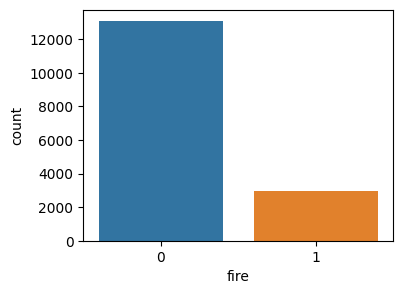

In [9]:
plt.figure(figsize=(4,3))
sns.countplot(x = labels)
plt.show()

In [10]:
labels.value_counts()

0    13099
1     2988
Name: fire, dtype: int64

In [11]:
ratio = labels.value_counts()[1]/labels.size
ratio

0.1857400385404364

### Correlation

In [12]:
import random
inds = random.sample([i for i in range(len(data.columns))], 10)

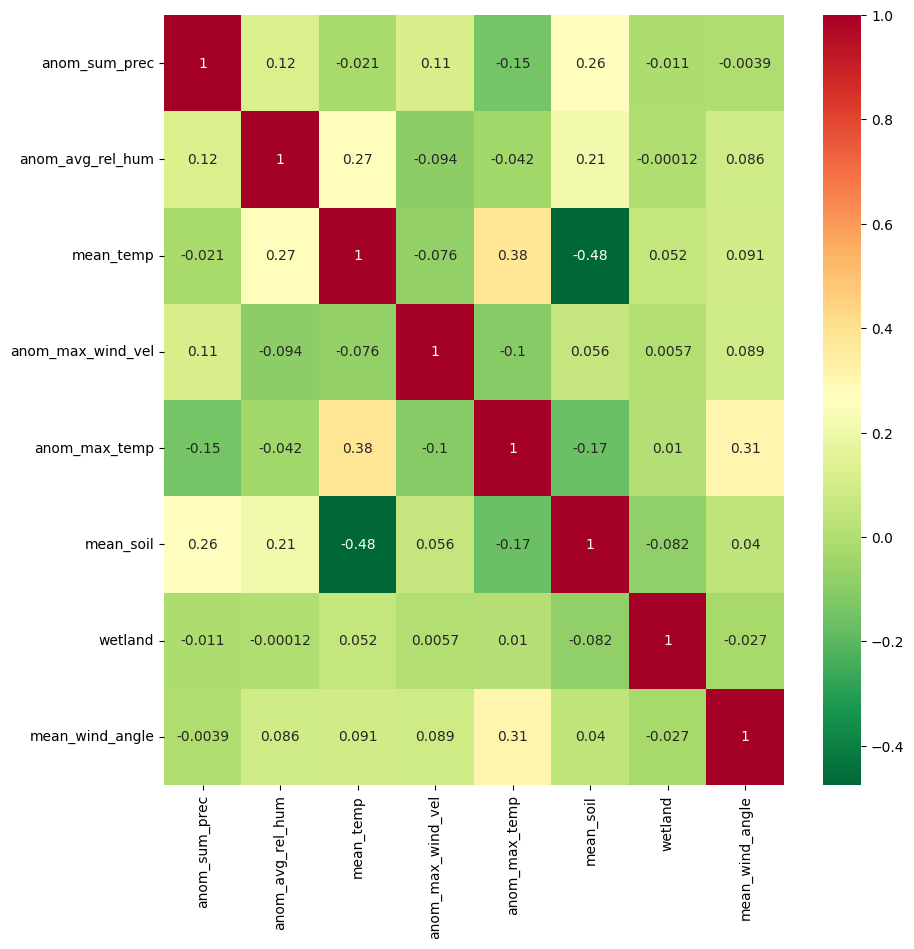

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(data[data.columns[inds]].corr(numeric_only=True), cmap='RdYlGn_r', annot=True)
plt.show()

### Focus on strong correlations


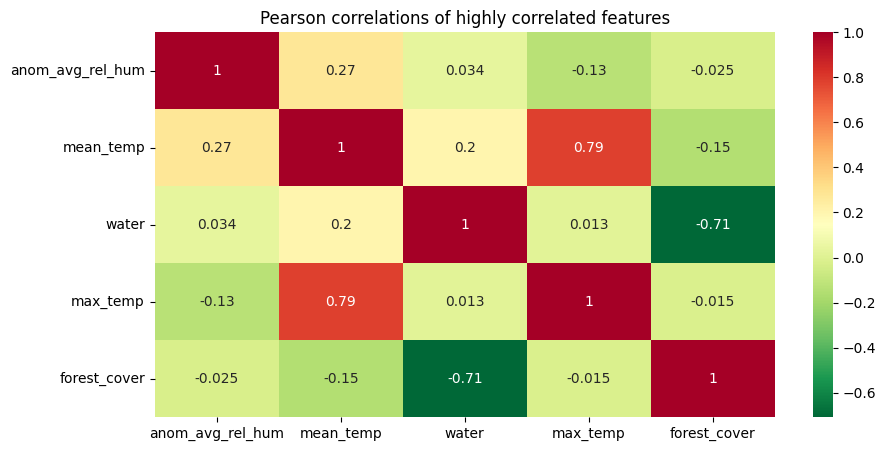

In [14]:
thresh = 0.7
cor = data.corr(numeric_only=True)

temp = cor.abs().unstack().sort_values(ascending=False)
most_cor_var = temp.loc[temp>thresh].reset_index().drop_duplicates(subset=[0])
most_cor_var_names = pd.unique(most_cor_var["level_0"].tolist()+most_cor_var["level_1"].tolist()).tolist()

top_cor = cor.loc[(cor.index.isin(most_cor_var_names)), (cor.columns.isin(most_cor_var_names))]

plt.figure(figsize=(10,5))
sns.heatmap(top_cor, cmap='RdYlGn_r', annot=True)
plt.title("Pearson correlations of highly correlated features")
plt.show()

### 4 Informative plots

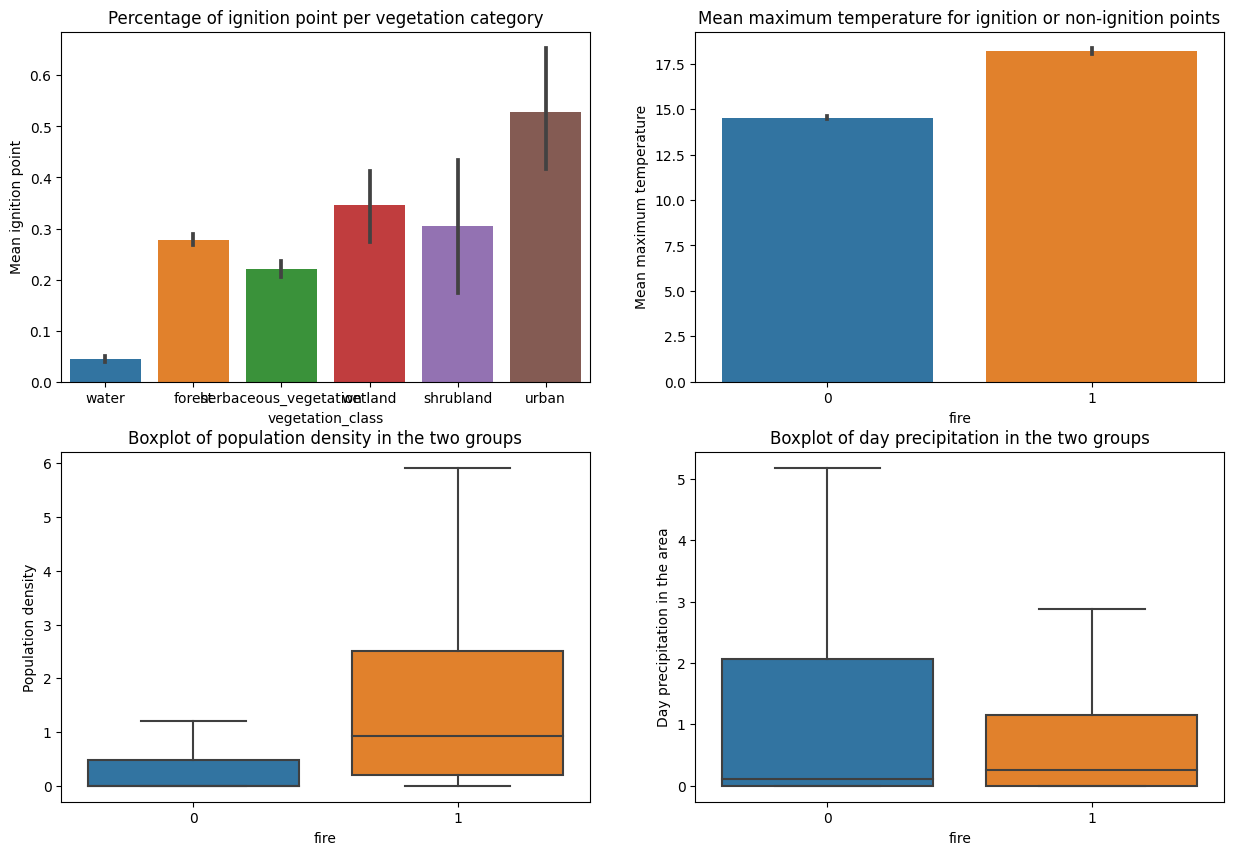

In [15]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x=data["vegetation_class"], y=labels.astype("int"))
plt.ylabel("Mean ignition point")
plt.title("Percentage of ignition point per vegetation category")

plt.subplot(2,2,2)
sns.barplot(x=labels, y=data["max_temp"])
plt.ylabel("Mean maximum temperature")
plt.title("Mean maximum temperature for ignition or non-ignition points")

plt.subplot(2,2,3)
sns.boxplot(x=labels,y=data["pop_dens"], showfliers=False)
plt.ylabel("Population density")
plt.title("Boxplot of population density in the two groups")

plt.subplot(2,2,4)
sns.boxplot(x=labels, y=data["sum_prec"], showfliers=False)
plt.ylabel("Day precipitation in the area")
plt.title("Boxplot of day precipitation in the two groups")

plt.show()

In [16]:
# resample by year to show an evolution
data_resampled = df.copy()
data_resampled["Date"] = pd.to_datetime(data_resampled["Date"])
data_resampled = data_resampled.resample("Y", on="Date").agg("mean", numeric_only=True)

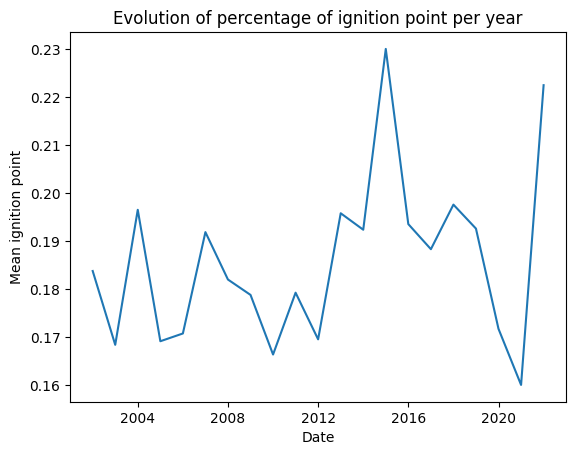

In [17]:
sns.lineplot(x=data_resampled.index, y=data_resampled["fire"])
plt.ylabel("Mean ignition point")
plt.title("Evolution of percentage of ignition point per year")
plt.show()

Here is some plots about the features distributions. We can see for instance that the temperature is similar to a Gaussian. We can also see that most ratios are 0 or 1. 

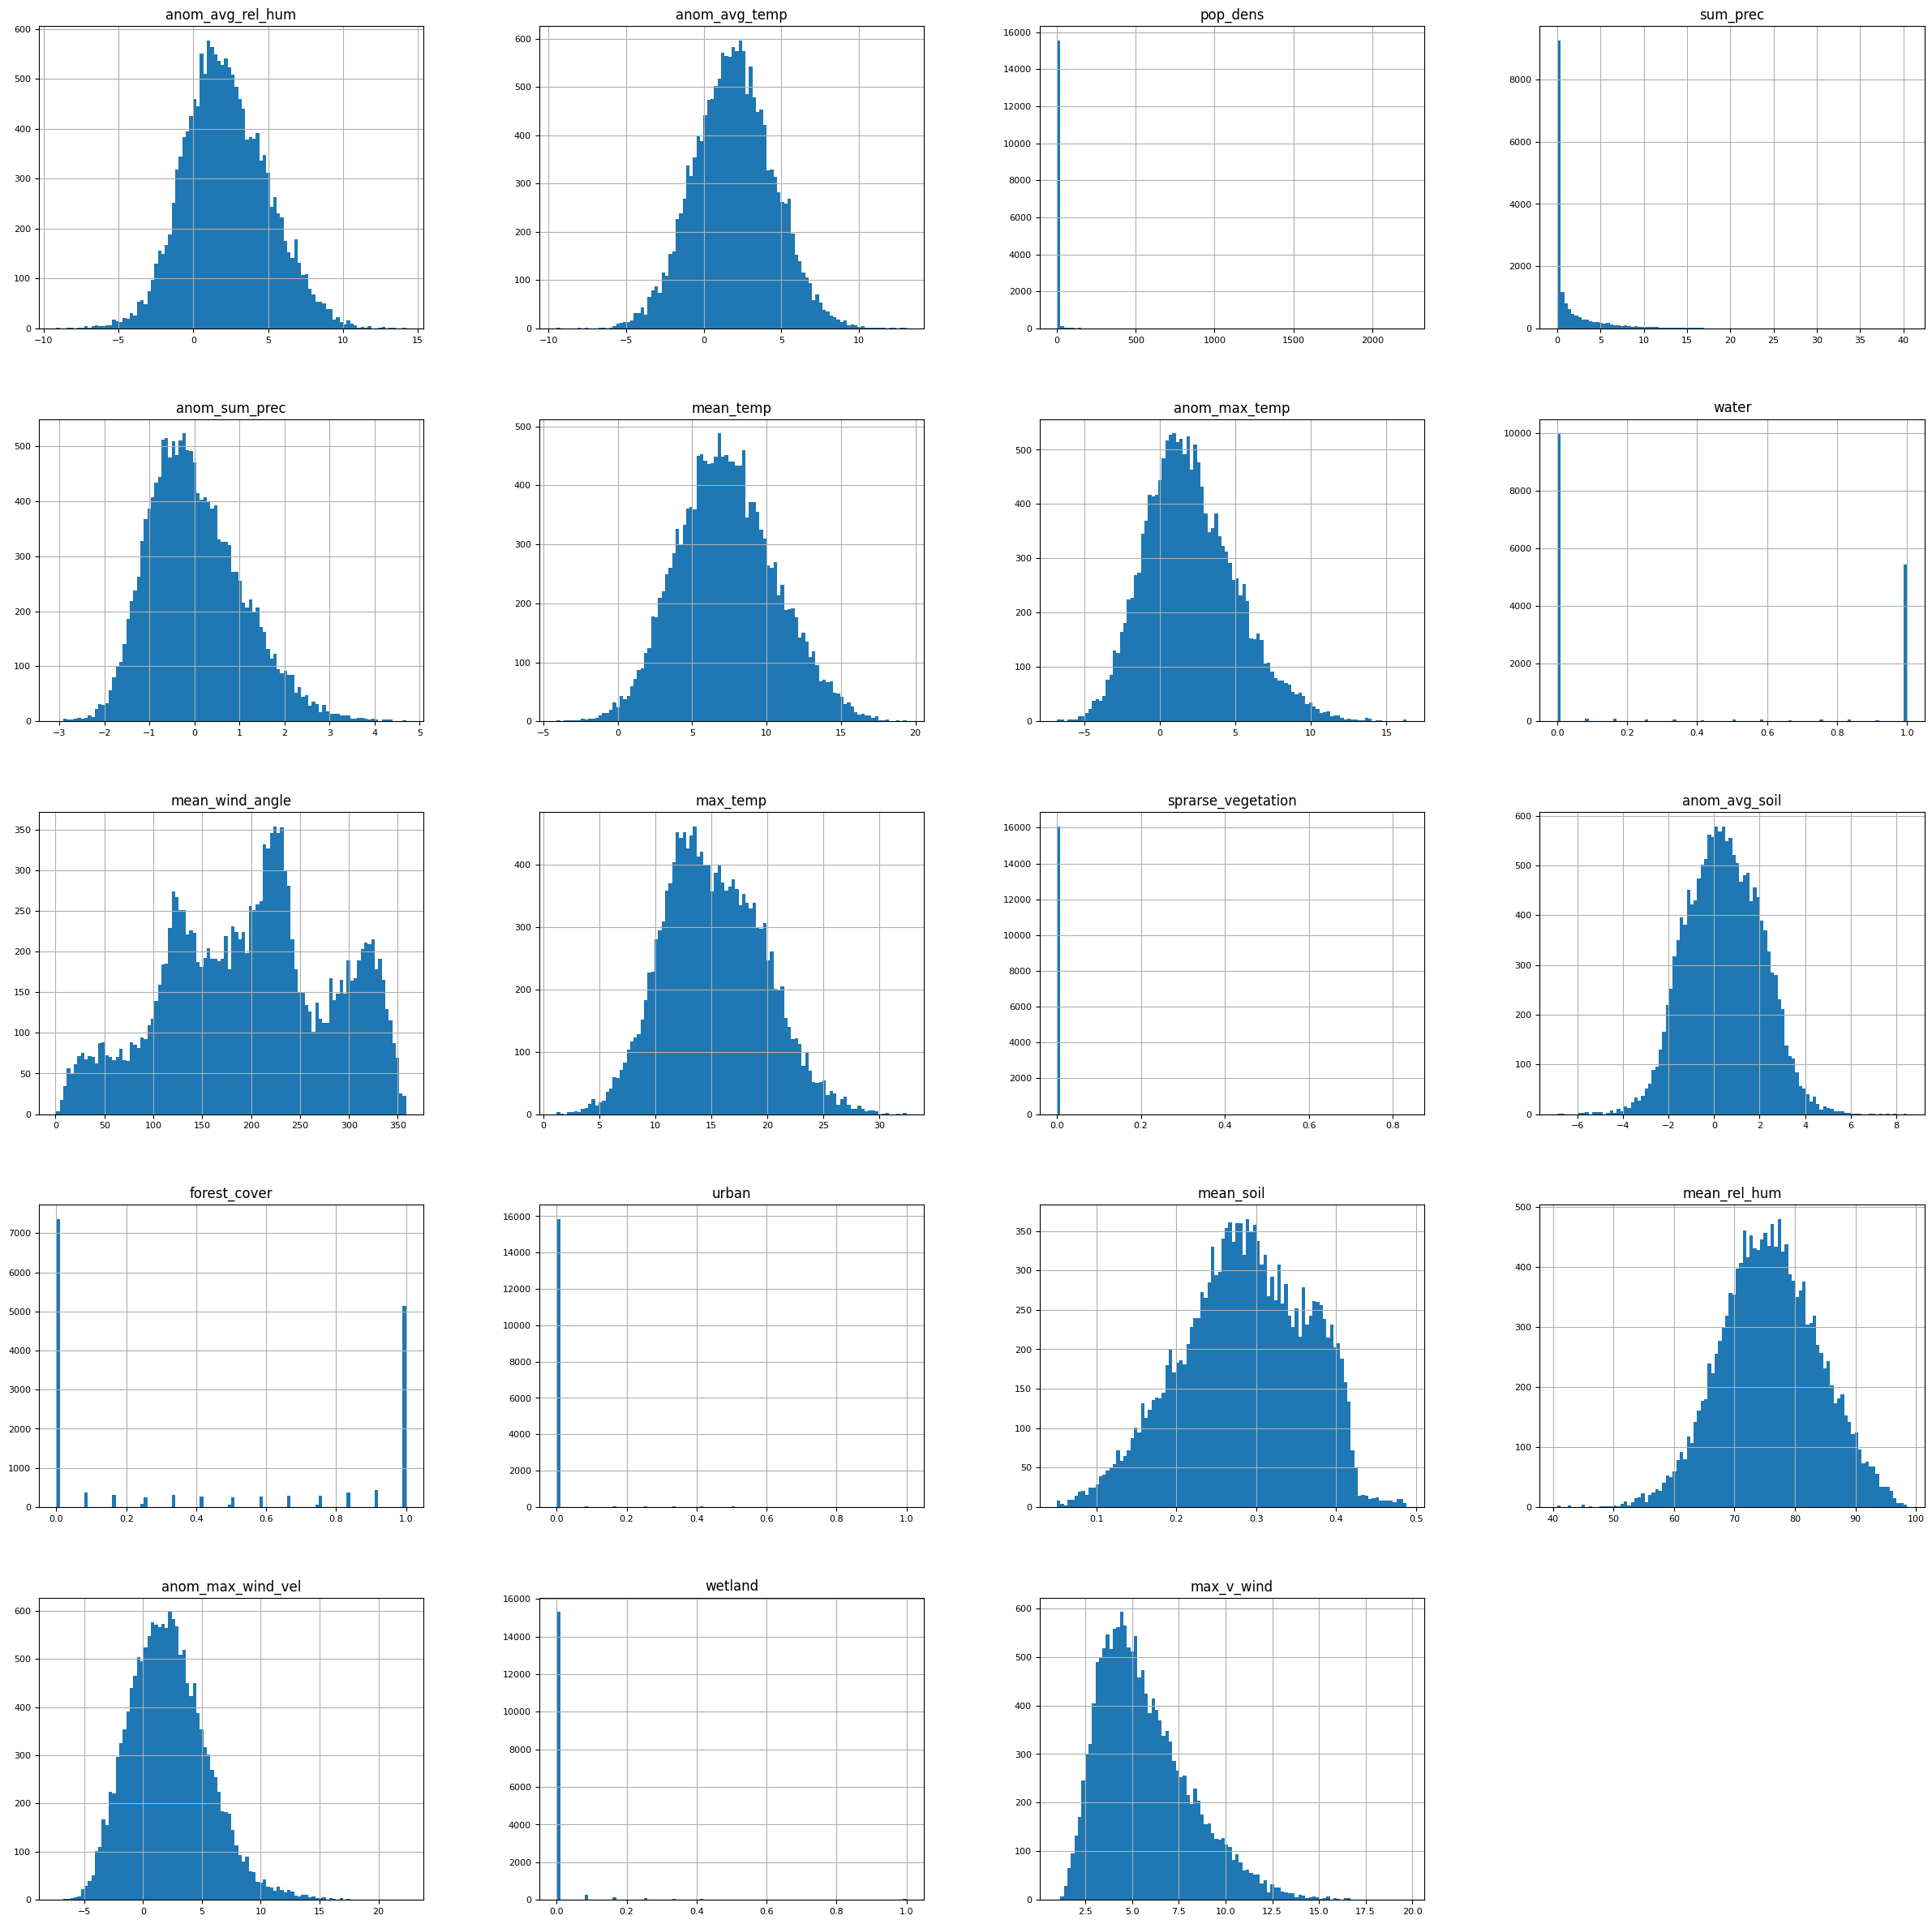

In [18]:
data.hist(figsize=(30, 30), bins = 100, xlabelsize=8, ylabelsize=8)
plt.show()

## **Baseline Model: Random Forest**

We propose a simple random forest as a first model to classify each data point.

Beforehand:
* one-hot encoding is applied to the categorical variable `vegetation_class`
* the score is the *adjusted* balanced accuracy score

**Pipeline Creation**

One Hot Encoding is applied on categorical variable `vegetation_class`

In [19]:
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ["vegetation_class"]
categorical_pipeline = make_pipeline(OneHotEncoder(handle_unknown='ignore'))
numerical_cols = ['mean_temp', 'urban', 'max_v_wind', 'water', 'forest_cover', 'pop_dens',
                  'max_temp', 'sum_prec', 'mean_soil', 'mean_rel_hum', 'wetland',
                  'mean_wind_angle']

numerical_pipeline = make_pipeline(
    SimpleImputer(strategy='constant', fill_value=-1)
)

preprocessor = make_column_transformer(
    (categorical_pipeline, categorical_cols),
    (numerical_pipeline, numerical_cols),
)

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('transformer', preprocessor),
    ('classifier', RandomForestClassifier(
        n_jobs=-1,
        random_state=42,
        class_weight="balanced_subsample",
        criterion="gini",
        max_depth=6,
        min_samples_leaf=1,
        min_samples_split=3,
        n_estimators=50,)
    ),
])

**Training**

In [21]:
X_train, y_train = get_train_data("./")
X_train.head()

,vegetation_class,anom_avg_rel_hum,anom_avg_temp,pop_dens,sum_prec,anom_sum_prec,mean_temp,anom_max_temp,water,mean_wind_angle,max_temp,sprarse_vegetation,anom_avg_soil,forest_cover,urban,mean_soil,mean_rel_hum,anom_max_wind_vel,wetland,max_v_wind
5335,4,6.979440,6.813464,0.000000,0.000000,-0.136566,15.749951,-0.437779,1.0,181.385452,19.260298,0.0,4.067547,0.000000,0.0,0.324152,89.084938,6.252600,0.0,7.752132
1742,4,-1.701800,-2.768173,0.000000,0.000000,0.164656,3.487537,-4.038760,1.0,95.336159,10.519860,0.0,-0.902094,0.000000,0.0,0.242861,66.649055,1.148833,0.0,6.502524
452,4,6.957098,7.210536,0.000000,0.000000,-0.498468,13.462303,6.865208,1.0,247.314209,17.889561,0.0,-1.594395,0.000000,0.0,0.227926,85.283119,-1.097929,0.0,5.948625
5646,1,2.485430,-1.493537,0.111412,0.874505,0.196052,4.150864,4.542403,0.0,226.951355,17.807596,0.0,1.429170,0.000000,0.0,0.353456,63.548611,4.349072,0.0,6.085150
10273,0,1.731156,1.364491,0.716459,1.018497,-0.113914,4.057020,1.170420,0.0,127.887276,11.430705,0.0,0.536037,0.583333,0.0,0.338681,75.986786,4.153082,0.0,6.405376


In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score, make_scorer

# Scorer
scorer = make_scorer(balanced_accuracy_score, adjusted=True)

scores = cross_val_score(pipeline, X_train, y_train, cv=8, scoring=scorer)

print("mean: %e (+/- %e)" % (scores.mean(), scores.std()))

mean: 6.278147e-01 (+/- 1.491206e-02)


**Testing**

In [23]:
X_test, y_test = get_test_data("./")
X_test.head()

,vegetation_class,anom_avg_rel_hum,anom_avg_temp,pop_dens,sum_prec,anom_sum_prec,mean_temp,anom_max_temp,water,mean_wind_angle,max_temp,sprarse_vegetation,anom_avg_soil,forest_cover,urban,mean_soil,mean_rel_hum,anom_max_wind_vel,wetland,max_v_wind
4190,1,-1.510936,0.855211,0.000000,4.147399,-0.280096,4.922586,-0.431775,0.0,348.729004,9.579041,0.0,2.812308,0.00,0.0,0.299842,77.901184,3.189493,0.000000,7.453110
3834,1,-5.836897,-1.665616,1.382313,0.605198,-0.022670,0.590504,-0.739298,0.0,244.346420,8.581940,0.0,-1.101922,0.00,0.0,0.366554,69.709373,6.778657,0.000000,6.341162
14329,0,-1.356784,5.662811,0.000000,0.366285,1.899575,8.032756,7.514242,0.0,222.747787,19.665213,0.0,-0.717847,0.75,0.0,0.327469,69.480011,-1.636728,0.083333,2.827232
7345,4,1.949483,3.143090,0.000000,0.000000,-0.662085,6.051140,2.645872,1.0,209.527359,11.857652,0.0,-1.589741,0.00,0.0,0.268133,77.098526,-0.963843,0.000000,4.983020
4710,0,0.716974,0.187437,1.663239,0.471398,0.104028,6.832418,1.676524,0.0,64.846931,16.226339,0.0,1.076904,1.00,0.0,0.341013,75.767120,2.437596,0.000000,2.750021


In [24]:
clf = pipeline.fit(X_train, y_train)

## Scoring

Three scores are computed:
- Balanced accuracy
- F-$\beta$ score, with $\beta$=2 (binary, and macro scores)

In [25]:
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)
metric = balanced_accuracy_score(y_test, y_pred)
print("Balanced accuracy on test set:", metric)

Balanced accuracy on test set: 0.8052429903098633


In [26]:
from sklearn.metrics import fbeta_score, classification_report

score = fbeta_score(y_test, y_pred, beta=2, average="macro")
print("Macro F-2 score on test set:", score)
score_ = fbeta_score(y_test, y_pred, beta=2, average="binary")
print("Positive class F-2 score on test set:", score_)

print(classification_report(y_test, y_pred))

Macro F-2 score on test set: 0.7443289176866339
Positive class F-2 score on test set: 0.7274522712310731
              precision    recall  f1-score   support

           0       0.97      0.72      0.83      3270
           1       0.42      0.89      0.57       747

    accuracy                           0.75      4017
   macro avg       0.69      0.81      0.70      4017
weighted avg       0.86      0.75      0.78      4017



##### ROC and Precision-Recall curves :

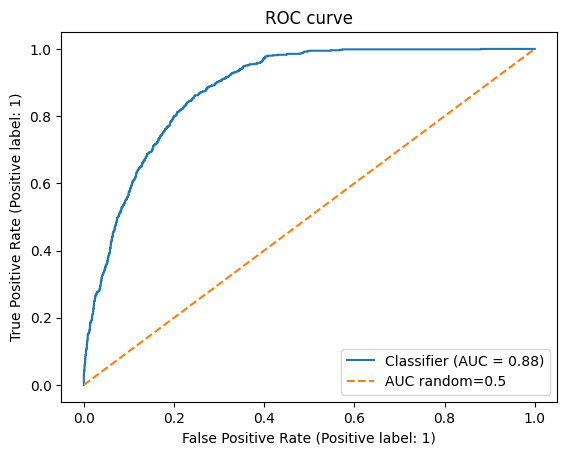

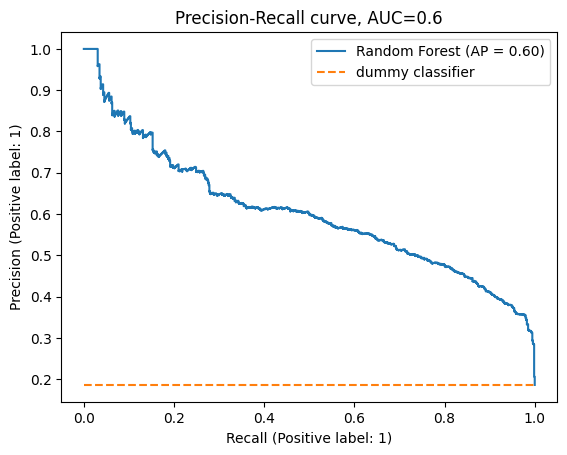

In [27]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve, RocCurveDisplay, roc_auc_score, auc

display_roc = RocCurveDisplay.from_predictions(y_test, y_pred_proba[:,1])
roc_auc = roc_auc_score(y_test, y_pred_proba[:,1])
display_roc.ax_.plot(np.linspace(0,1,50),np.linspace(0,1,50),linestyle='--',label="AUC random="+str(0.5))
_ = display_roc.ax_.set_title("ROC curve")
plt.legend()

pr, rec, _ = precision_recall_curve(y_test,y_pred_proba[:,1])
auc_ = auc(rec, pr)

baseline = np.where(y_test==1)[0].shape[0]/len(y_test)

display_prec = PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba[:,1], name="Random Forest")

display_prec.ax_.plot(np.linspace(0,1,50),np.linspace(baseline,baseline,50), linestyle='--', label='dummy classifier')
_ = display_prec.ax_.set_title("Precision-Recall curve, AUC="+str(np.round(auc_,2)))
plt.legend()
plt.show()

## **Quick submission test**

You can test any submission locally by running:

```
ramp-test --submission <submission folder>
```
If you want to quickly test the that there are no obvious code errors, use the `--quick-test` flag to only use a small subset of the data.

```
ramp-test --submission <submission folder> --quick-test
```

See the [online documentation](https://paris-saclay-cds.github.io/ramp-docs/ramp-workflow/stable/using_kits.html) for more details.